# Math

Part 1: Make the proof of the Frisch–Waugh–Lovell theorem using Matrix Algebra.

\begin{align*}
&\text{First, we run } y \text{ on } W: \\
&y = W\hat{\theta_1} + \epsilon_{y} \\
&\epsilon_{y} = y - W\hat{\theta_1} \\
\\
&\text{Next, we run } D \text{ on } W: \\
&D = W\hat{\theta_2} + \epsilon_{D} \\
&\epsilon_{D} = D - W\hat{\theta_2} \\
\\
&\text{When running } \epsilon_{y} \text{ on } \epsilon_{D}, \text{ we get:} \\
&y = W\hat{\theta_1} + D\psi - W\hat{\theta_2}\psi + \xi \\
&y = W\hat{\theta_1} + D\psi - W\hat{\theta_2}\psi + \xi \\
&y = D\psi + W\hat{\theta_1} - W\hat{\theta_2}\psi + \xi \\
&y = D\psi + W(\hat{\theta_1} - \hat{\theta_2}\psi) + \xi \\
\\
&\text{Comparing with the exercise } (y = D\beta_{1} + W\beta_{1} + \mu), \text{ we can conclude:} \\
&\bullet \ \beta_{1} = \psi \\
&\bullet \ \beta_{2} = \hat{\theta_1} - \hat{\theta_2}\psi \\
&\bullet \ \mu = \xi \\
\end{align*}

Part 2: Show that the Conditional Expectation Function minimizes expected squared error.

\begin{align*}
E[(Y - g(x))^2] &= E[(Y - E(Y \mid x) + E(Y \mid x) - g(x))^2] \\
&= E[(Y - E(Y \mid x))^2] + E[(E(Y \mid x) - g(x))^2] + 2E[(Y - E(Y \mid x))E[E(Y \mid x) - g(x)]] \\
&= E[(Y - E(Y \mid x))^2] + E[(E(Y \mid x) - g(x))^2] + 2E[(Y - E(Y \mid x))E[E(Y \mid x) - g(x)]] \\
&= E[(Y - E(Y \mid x))^2] + E[(E(Y \mid x) - g(x))^2] + 2E[(Y - E(Y \mid x))E[E(Y \mid x) - g(x)]] \\
&= 2E[(Y - E(Y \mid x))E[E(Y \mid x) - g(x)]] \\
&= E[E[(Y - E(Y \mid x))[E(Y \mid x) - g(x)] \mid x]] \\
&= E[(E(Y \mid x))(E(Y \mid x) - g(x))] \\
&= 0 \text{ (Where: } E(Y \mid x) = 0) \\
&= E[(Y - g(x))^2] = E[(Y - E(Y \mid x))^2] + E[(E(Y \mid x) - g(x))^2] \\
&\text{(Where: } E[(E(Y \mid x) - g(x))^2 \geq 0) \\
&\Rightarrow E[(Y - g(x))^2] \geq E[(Y - E(Y \mid x))^2] \\
&\Rightarrow E[(Y - g(x))^2] \geq E[(\epsilon^2)] \\
&\Rightarrow E[(Y - g(x))^2] = E[(\epsilon^2)]
\end{align*}

# Replication

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
#rdata_read = pyreadr.read_r("../../data/wage2015_subsample_inference.Rdata")

data  = pd.read_csv(r'wage2015_subsample_inference.csv')

data['occ']=pd.Categorical(data.occ)
data['occ2']=pd.Categorical(data.occ2)
data['ind']=pd.Categorical(data.ind)
data['ind2']=pd.Categorical(data.ind2)

data.shape

(5150, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   rownames  5150 non-null   int64   
 1   wage      5150 non-null   float64 
 2   lwage     5150 non-null   float64 
 3   sex       5150 non-null   float64 
 4   shs       5150 non-null   float64 
 5   hsg       5150 non-null   float64 
 6   scl       5150 non-null   float64 
 7   clg       5150 non-null   float64 
 8   ad        5150 non-null   float64 
 9   mw        5150 non-null   float64 
 10  so        5150 non-null   float64 
 11  we        5150 non-null   float64 
 12  ne        5150 non-null   float64 
 13  exp1      5150 non-null   float64 
 14  exp2      5150 non-null   float64 
 15  exp3      5150 non-null   float64 
 16  exp4      5150 non-null   float64 
 17  occ       5150 non-null   category
 18  occ2      5150 non-null   category
 19  ind       5150 non-null   category
 20  ind2    

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [5]:
#Filter the college-advanced educated workers
data = data[(data['scl']==1)|(data['clg']==1)|(data['ad']==1)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5149
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   rownames  3774 non-null   int64   
 1   wage      3774 non-null   float64 
 2   lwage     3774 non-null   float64 
 3   sex       3774 non-null   float64 
 4   shs       3774 non-null   float64 
 5   hsg       3774 non-null   float64 
 6   scl       3774 non-null   float64 
 7   clg       3774 non-null   float64 
 8   ad        3774 non-null   float64 
 9   mw        3774 non-null   float64 
 10  so        3774 non-null   float64 
 11  we        3774 non-null   float64 
 12  ne        3774 non-null   float64 
 13  exp1      3774 non-null   float64 
 14  exp2      3774 non-null   float64 
 15  exp3      3774 non-null   float64 
 16  exp4      3774 non-null   float64 
 17  occ       3774 non-null   category
 18  occ2      3774 non-null   category
 19  ind       3774 non-null   category
 20  ind2      377

In [6]:
#We keep the most relevant regressors
Z = data[ ["lwage","sex","scl","clg","ad","ne","mw","so","we","exp1"] ]

#Data for women
data_female = data[data[ 'sex' ] == 1 ]
Z_female = data_female[ ["lwage","sex","scl","clg","ad","ne","mw","so","we","exp1"] ]

#Data for men
data_male = data[ data[ 'sex' ] == 0 ]
Z_male = data_male[ [ "lwage","sex","scl","clg","ad","ne","mw","so","we","exp1" ] ]

#Means by regressor and sex
table = np.zeros( (10, 3) )
table[:, 0] = Z.mean().values
table[:, 1] = Z_male.mean().values
table[:, 2] = Z_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women']) # from table to dataframe
table_pandas.index = ["Log Wage","Sex","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]

table_pandas

,All,Men,Women
Log Wage,3.062748,3.099449,3.024417
Sex,0.489136,0.000000,1.000000
Some College,0.379438,0.405602,0.352113
Gollage Graduate,0.433492,0.436203,0.430661
Advanced Degree,0.187069,0.158195,0.217226
Northeast,0.229200,0.219917,0.238895
Midwest,0.249868,0.245851,0.254063
South,0.298357,0.303423,0.293066
West,0.222576,0.230809,0.213976
Experience,12.510201,12.202282,12.831798


In [7]:
#Average difference in logwage between college educated workers
data_female['lwage'].mean()- data_male['lwage'].mean()

-0.07503200512595809

Thus, the unconditional gender wage gap is about $7,5$\% (women get paid less on average in our sample). We also observe that working women are relatively more educated than working men and have lower working experience (on average).

In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
#Import libraries for regressions and statistical models
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Regression without controls

In [10]:
#OLS regression without any additional regressors
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex'] #keep the estimator of sex in an object
nocontrol_est

-0.0750320051259581

In [11]:
nocontrol_se2 = nocontrol_model.fit().summary2().tables[1]['Std.Err.']['sex'] #keep the std error of sex in an object
nocontrol_se2

0.01837383714154331

In [12]:
# robust standar erros
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

0.018342600934807274

In [13]:
# robust standar erros
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]
nocontrol_se

# print unconditional effect of gender and the corresponding standard error

print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding standard error is {nocontrol_se2}' )
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}','\n' )

The estimated gender coefficient is -0.0750320051259581 and the corresponding standard error is 0.01837383714154331
The estimated gender coefficient is -0.0750320051259581 and the corresponding robust standard error is 0.018342600934807274 



# Controlled regression

In [14]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[42]  # error standard for sex's coefficients 

control_se


print( f"Coefficient for OLS with controls {control_est} and the corresponding robust standard error is {control_se}" )

# confidence interval
control_model.fit().conf_int( alpha=0.05 ).loc[['sex']]

              Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept  3.880838  0.463424  8.374276  7.905787e-17  2.972233  4.789442
occ2[T.2]  0.148912  0.134319  1.108643  2.676598e-01 -0.114439  0.412263
occ2[T.3]  0.151683  0.173250  0.875516  3.813527e-01 -0.187997  0.491363
occ2[T.4]  0.024109  0.189196  0.127429  8.986084e-01 -0.346835  0.395053
occ2[T.5] -0.435165  0.197117 -2.207651  2.733256e-02 -0.821639 -0.048691
...             ...       ...       ...           ...       ...       ...
exp4:scl   0.024112  0.025867  0.932148  3.513237e-01 -0.026604  0.074829
exp4:clg   0.008900  0.023652  0.376285  7.067278e-01 -0.037473  0.055273
exp4:mw    0.012197  0.022784  0.535335  5.924519e-01 -0.032474  0.056868
exp4:so    0.006360  0.019596  0.324536  7.455511e-01 -0.032061  0.044780
exp4:we    0.033250  0.020541  1.618716  1.055976e-01 -0.007023  0.073524

[236 rows x 6 columns]
Coefficient for OLS with controls -0.06763389814418622 and the corresponding robust stan

,0,1
sex,-0.101899,-0.033369


# Partialling-Out using ols

In [15]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = data ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = data ).fit().resid


data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )


# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']


# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f"Coefficient for D via partialling-out {partial_est} and the corresponding robust standard error is {partial_se}" )

# confidence interval
partial_fit.conf_int( alpha=0.05 ).loc[['t_D']]

Coefficient for D via partialling-out -0.06763389814419274 and the corresponding robust standard error is 0.01676536062953696


,0,1
t_D,-0.100823,-0.034445


In [16]:
#np.vstack(( t_Y.values , t_D.values )).T

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
data_res

,t_Y,t_D
0,-0.509678,0.083315
1,0.362579,-0.647915
2,-1.051747,0.400809
3,0.212027,0.316279
4,-0.430030,0.430993
...,...,...
3769,-0.526953,-0.444549
3770,-0.191339,-0.411842
3771,0.628487,0.518624
3772,-0.058179,0.048409


# Graphical data analysis

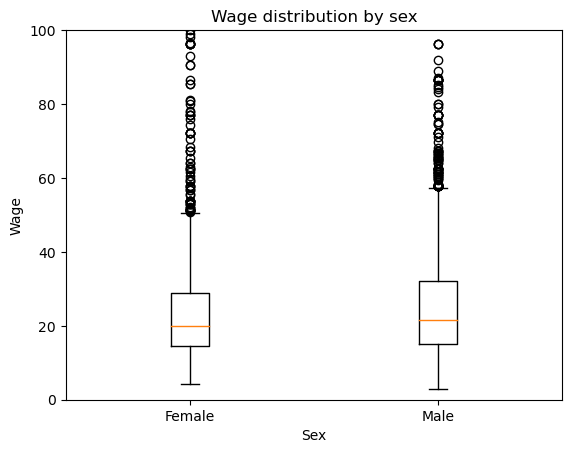

In [17]:
#Import library
import matplotlib.pyplot as plt

#Wage distribution

#Wage distribution by sex
plt.boxplot([data_female['wage'],data_male['wage']],labels=['Female','Male'])

plt.xlabel('Sex')
plt.ylabel('Wage')
plt.title('Wage distribution by sex')
plt.ylim([0,100])

plt.show()

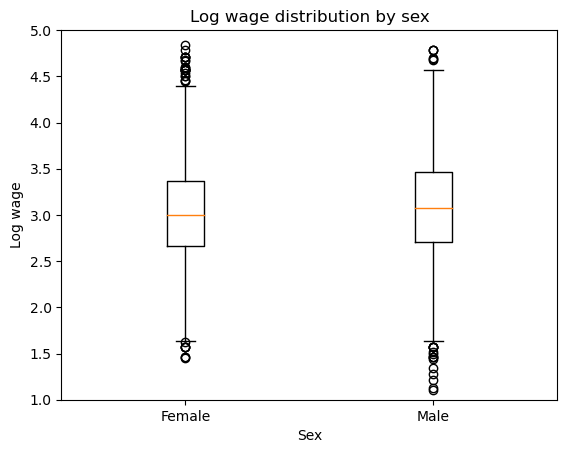

In [18]:
#Logwage distribution by sex
plt.boxplot([data_female['lwage'],data_male['lwage']],labels=['Female','Male'])

plt.xlabel('Sex')
plt.ylabel('Log wage')
plt.title('Log wage distribution by sex')
plt.ylim([1,5])

plt.show()

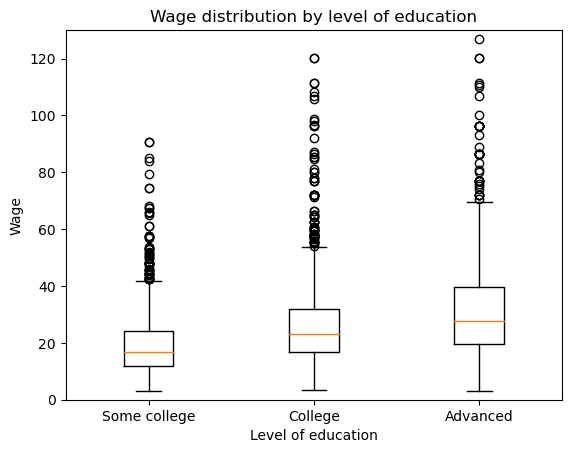

In [19]:
#Wage distribution by level of education

plt.boxplot([data['wage'][data['scl']==1],data['wage'][data['clg']==1],data['wage'][data['ad']==1]],
            labels=['Some college','College','Advanced'])

plt.xlabel('Level of education')
plt.ylabel('Wage')
plt.title('Wage distribution by level of education')
plt.ylim([0,130])

plt.show()

The quartile superior increases with the level of education, indicating a higher concentration of individuals with higher wages for advanced education.

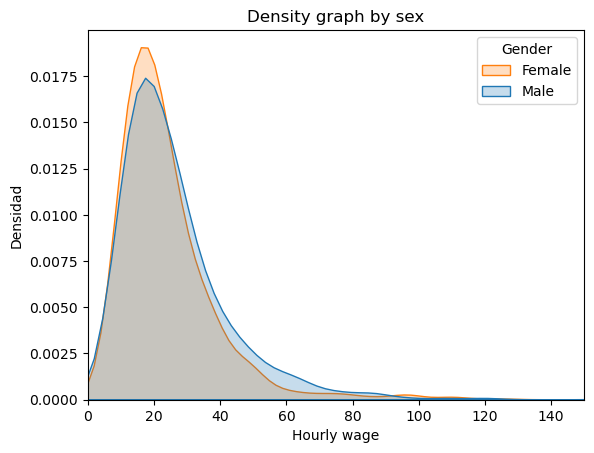

In [20]:
#Density distribution of wages by sex

import seaborn as sns

sns.kdeplot(data=data, x='wage', hue='sex', fill=True)

plt.xlabel('Hourly wage')
plt.ylabel('Densidad')
plt.title('Density graph by sex')
plt.xlim([0,150])
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

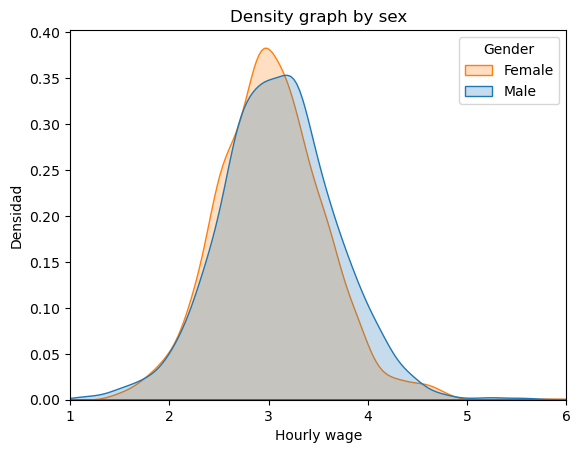

In [21]:
#Density distribution of log wages by sex

import seaborn as sns

sns.kdeplot(data=data, x='lwage', hue='sex', fill=True)

plt.xlabel('Hourly wage')
plt.ylabel('Densidad')
plt.title('Density graph by sex')
plt.xlim([1,6])
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

Confidence Intervals of Sex's Coefficients

In [23]:
#No control model results
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = data )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
print(nocontrol_est)

# confidence interval
ll_nocontrol = nocontrol_model.fit().conf_int( alpha=0.05 ).iloc[1, 0]
ll_nocontrol

-0.0750320051259581


-0.11105562342754237

In [25]:
#Controlled model results
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'
control_model = smf.ols( formula = flex, data = data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']
print(control_est)

# confidence interval
ll_control = control_model.fit().conf_int( alpha=0.05 ).loc[['sex']].iloc[0, 0]
ll_control

-0.06763389814419676


-0.10189889383728354

In [26]:
#Partialling out results
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)'
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(scl+clg+ad+occ2+ind2+mw+so+we)' 

t_Y = smf.ols( formula = flex_y , data = data ).fit().resid

t_D = smf.ols( formula = flex_d , data = data ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )

partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

# confidence interval
ll_partial = partial_fit.conf_int(alpha=0.05).iloc[1, 0]
ll_partial

-0.10082303385512609

In [27]:
#Find deviation from our estimands
err_nocontrol = nocontrol_est - ll_nocontrol
err_control = control_est - ll_control
err_partial = partial_est - ll_partial

In [28]:
coef = [nocontrol_est,control_est, partial_est]
err = [err_nocontrol,err_control, err_partial]
varname = ["No control", "Control", "Partial"]

In [29]:
coef_df = pd.DataFrame({'coef': coef,
                        'err': err,
                        'varname': varname
                       })

coef_df 

,coef,err,varname
0,-0.075032,0.036024,No control
1,-0.067634,0.034265,Control
2,-0.067634,0.033189,Partial


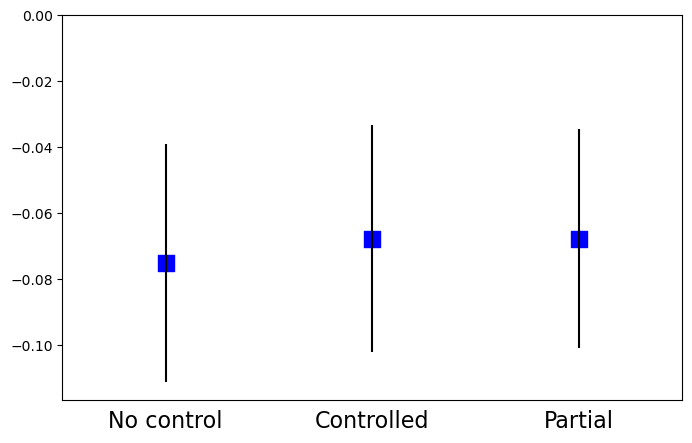

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bar graph with error bars
coef_df.plot(x='varname', y='coef', kind='bar', ax=ax, color='none', yerr='err', legend=False)

# Plot markers
ax.scatter(x=range(coef_df.shape[0]), marker='s', s=120, y=coef_df['coef'], color='blue')

# Customize axes and labels
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_ticks_position('none')
ax.set_xticklabels(['No control', 'Controlled', 'Partial'], rotation=0, fontsize=16)

plt.show()

# Cross-Validation in Lasso Regression

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

1. Data Preparation

In [53]:
#Load data
data = pd.read_csv("wage2015_subsample_inference.csv")

# Drop missing values
data.dropna(inplace=True)

data

,rownames,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,...,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
0,10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,7.0,0.49,0.343,0.2401,3600.0,11,8370.0,18
1,12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,31.0,9.61,29.791,92.3521,3050.0,10,5070.0,9
2,15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,18.0,3.24,5.832,10.4976,6260.0,19,770.0,4
3,18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,25.0,6.25,15.625,39.0625,420.0,1,6990.0,12
4,19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,22.0,4.84,10.648,23.4256,2015.0,6,9470.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,9.0,0.81,0.729,0.6561,4700.0,16,4970.0,9
5146,32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,12.0,1.44,1.728,2.0736,4110.0,13,8680.0,20
5147,32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,11.0,1.21,1.331,1.4641,1550.0,4,3680.0,6
5148,32631,32.967033,3.495508,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,10.0,1.00,1.000,1.0000,2920.0,9,6570.0,11


2. Define a Range of Alpha (Lambda in our equation) Values

In [84]:
# Define a range of alpha values
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5]

alpha_values

[0.1, 0.2, 0.3, 0.4, 0.5]

3. Partition the Dataset for k-Fold Cross-Validation

In [85]:
from sklearn.model_selection import KFold

k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

4. Lasso regression implementation

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

def lasso_regression(train_X, train_y, alpha):
    model = Lasso(alpha=alpha, max_iter=1000000)
    model.fit(train_X, train_y)
    return model.coef_, model.intercept_

5. Cross validation loop

In [91]:
mean_squared_errors = []

for alpha in alpha_values:
    fold_errors = []
    for train_index, val_index in kf.split(data):
        train_data, val_data = data.iloc[train_index], data.iloc[val_index]
        train_X, train_y = train_data.drop('wage', axis=1), train_data['wage']
        val_X, val_y = val_data.drop('wage', axis=1), val_data['wage']

        coefficients, intercept = lasso_regression(train_X, train_y, alpha)
        predictions = np.dot(val_X, coefficients) + intercept
        mse = mean_squared_error(val_y, predictions)
        fold_errors.append(mse)

    mean_mse = np.mean(fold_errors)
    mean_squared_errors.append(mean_mse)

6. Selection of an optimal alpha

In [93]:
optimal_alpha = alpha_values[np.argmin(mean_squared_errors)]

optimal_alpha

0.1

7. Model Training and Evaluation

In [95]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_X, train_y = train_data.drop('wage', axis=1), train_data['wage']
test_X, test_y = test_data.drop('wage', axis=1), test_data['wage']

# Train final model
final_coefficients, final_intercept = lasso_regression(train_X, train_y, optimal_alpha)

# Evaluate final model
final_predictions = np.dot(test_X, final_coefficients) + final_intercept
test_mse = mean_squared_error(test_y, final_predictions)

8. Report results

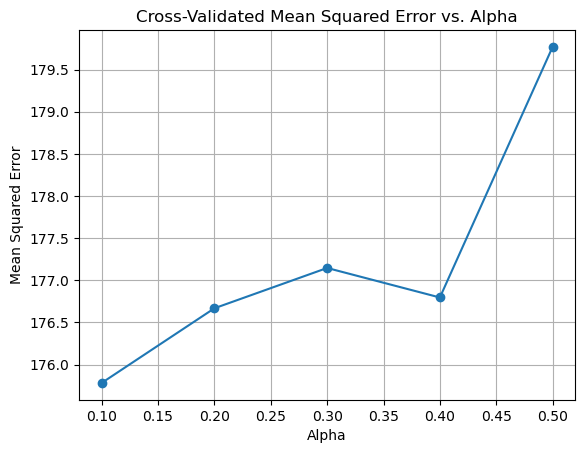

Optimal Alpha: 0.1
Test Set MSE of Final Lasso Model: 89.07728161956759


In [96]:
plt.plot(alpha_values, mean_squared_errors, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validated Mean Squared Error vs. Alpha')
plt.grid(True)
plt.show()

print("Optimal Alpha:", optimal_alpha)
print("Test Set MSE of Final Lasso Model:", test_mse)